In [1]:
from matplotlib import pyplot as plt
from whar_datasets import (
    get_dataset_cfg,
    WHARDatasetID,
    PostProcessingPipeline,
    PreProcessingPipeline,
    Loader,
    LOSOSplitter,
    KFoldSplitter,
    LGSOSplitter,
)

In [2]:
cfg = get_dataset_cfg(WHARDatasetID.SAD)

cfg.parallelize = True
cfg.in_memory = False
force_recompute = True
#force_recompute = [False, True, True]

In [3]:
pre_pipeline = PreProcessingPipeline(cfg)
activity_df, session_df, window_df = pre_pipeline.run(force_recompute)

2026-02-20 08:47:38,268 - whar-datasets - INFO - Forcing recompute
2026-02-20 08:47:38,268 - whar-datasets - INFO - Running DownloadingStep
2026-02-20 08:47:38,268 - whar-datasets - INFO - Checking hash for DownloadingStep
2026-02-20 08:47:38,273 - whar-datasets - INFO - Hash is up to date
2026-02-20 08:47:38,273 - whar-datasets - INFO - Downloading sensors-activity-recognition-dataset-shoaib.rar (Dataset: sad)
2026-02-20 08:47:50,350 - whar-datasets - INFO - Extracting sensors-activity-recognition-dataset-shoaib.rar
2026-02-20 08:47:50,405 - whar-datasets - INFO - Forcing recompute
2026-02-20 08:47:50,408 - whar-datasets - INFO - Running ParsingStep
2026-02-20 08:47:50,410 - whar-datasets - INFO - Checking hash for ParsingStep
2026-02-20 08:47:50,412 - whar-datasets - INFO - Hash is not up to date
2026-02-20 08:47:50,415 - whar-datasets - INFO - Checking download
2026-02-20 08:47:50,416 - whar-datasets - INFO - Download exists
2026-02-20 08:47:50,419 - whar-datasets - INFO - Parsing t

ValueError: No objects to concatenate

In [ ]:
# splitter = LOSOSplitter(cfg)
# splitter = LGSOSplitter(cfg)
splitter = KFoldSplitter(cfg)

splits = splitter.get_splits(session_df, window_df)
for split in splits:
    print(
        split.identifier,
        len(split.train_indices),
        len(split.val_indices),
        len(split.test_indices),
    )

fold_0 6905 1726 960
fold_1 6906 1726 959
fold_2 6906 1726 959
fold_3 6906 1726 959
fold_4 6906 1726 959
fold_5 6906 1726 959
fold_6 6906 1726 959
fold_7 6906 1726 959
fold_8 6906 1726 959
fold_9 6906 1726 959


In [ ]:
post_pipeline = PostProcessingPipeline(
    cfg, pre_pipeline, window_df, splits[0].train_indices
)
samples = post_pipeline.run(True)

2026-02-20 08:38:01,173 - whar-datasets - INFO - Forcing recompute
2026-02-20 08:38:01,176 - whar-datasets - INFO - Running SamplingStep
2026-02-20 08:38:01,178 - whar-datasets - INFO - Checking hash for SamplingStep
2026-02-20 08:38:01,184 - whar-datasets - INFO - Hash is not up to date
2026-02-20 08:38:06,799 - whar-datasets - INFO - Computing samples
2026-02-20 08:38:06,799 - whar-datasets - INFO - Getting normalization parameters
2026-02-20 08:38:08,810 - whar-datasets - INFO - Normalizing and transforming windows (parallelized)


[########################################] | 100% Completed | 40.41 s


2026-02-20 08:38:50,380 - whar-datasets - INFO - Saving samples
2026-02-20 08:38:53,109 - whar-datasets - INFO - Loading samples


In [ ]:
loader = Loader(session_df, window_df, post_pipeline.samples_dir, samples)

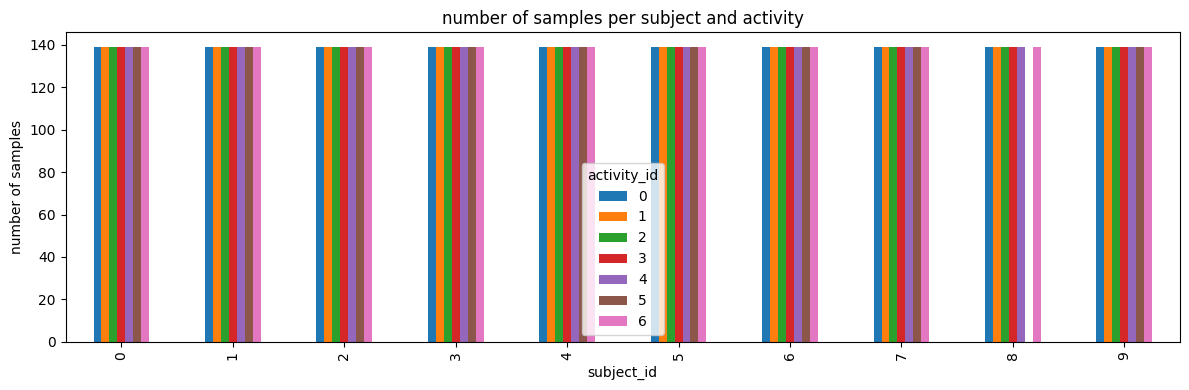

In [ ]:
len(loader)
loader.plot_indices_statistics(list(range(len(loader))))

Text(0.5, 1.0, ' Activity: [4], Subject: 0')

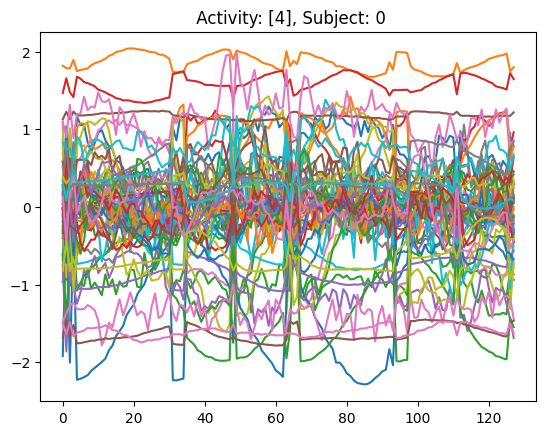

In [ ]:
subject_id = 0
activity_id = 4

# index as ra
ya, ys, (x,) = loader.sample_items(1, activity_id=activity_id, subject_id=subject_id)
ya_single = ya[0]
ys_single = ys[0]
x_single = x[0]

plt.plot(x_single)
plt.title(f" Activity: {ya_single}, Subject: {ys_single}")